In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/tiktok-popular-songs-2019/TikTok_songs_2019.csv")
df.head(9)

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.955,-3.836,1,4,0.0798,0.00221,0.000003,0.4860,0.790,150.034,4,179947
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.845,-7.422,0,4,0.2530,0.75900,0.232000,0.1000,0.749,75.221,4,160000
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.792,-3.755,0,2,0.0668,0.72600,0.000006,0.1220,0.758,118.050,4,215507
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.678,-8.635,1,9,0.1090,0.06690,0.000000,0.2740,0.811,97.984,4,200594
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.983,-4.374,0,5,0.0855,0.03800,0.000006,0.1830,0.957,92.998,4,235760
5,Falling for U,Peachy!,57,Falling for U,1,0.516,0.358,-12.018,0,8,0.4240,0.74300,0.000001,0.0813,0.397,79.509,4,124000
6,Shooting Stars,Bag Raiders,53,Bag Raiders (Deluxe),0,0.649,0.716,-6.232,1,11,0.0445,0.08790,0.030000,0.0824,0.503,124.968,4,235813
7,fast,Sueco,65,fast,0,0.877,0.503,-10.269,0,7,0.2200,0.16400,0.013200,0.1020,0.529,100.069,4,144000
8,On A Roll,Ashley O,43,On A Roll,58,0.736,0.810,-6.354,1,5,0.0906,0.07700,0.000000,0.0523,0.387,125.011,4,154448


In [4]:
df.shape

(223, 18)

In [5]:
df.nunique()

track_name          221
artist_name         209
artist_pop           68
album               220
track_pop            60
danceability        168
energy              189
loudness            220
mode                  2
key                  12
speechiness         198
acousticness        207
instrumentalness    112
liveness            175
valence             181
tempo               222
time_signature        4
duration_ms         221
dtype: int64

In [6]:
df.describe(include='all')

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,223,223,223.000000,223,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
unique,221,209,NaN,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Falling,SIX,NaN,Six: The Musical (Studio Cast Recording),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,3,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,58.946188,NaN,50.192825,0.742673,0.607139,-7.381161,0.650224,5.331839,0.149785,0.250346,0.033455,0.166932,0.582637,122.196578,3.977578,180451.502242
std,NaN,NaN,18.124862,NaN,25.744474,0.140774,0.172197,3.134507,0.477972,3.568786,0.141498,0.269444,0.137376,0.131863,0.218522,27.201311,0.275811,54352.579901
min,NaN,NaN,0.000000,NaN,0.000000,0.247000,0.127000,-19.238000,0.000000,0.000000,0.026100,0.000122,0.000000,0.019400,0.070000,62.619000,1.000000,43427.000000
25%,NaN,NaN,46.500000,NaN,42.500000,0.672000,0.475000,-8.799000,0.000000,2.000000,0.044550,0.030600,0.000000,0.089200,0.397500,102.470500,4.000000,145440.000000
50%,NaN,NaN,61.000000,NaN,58.000000,0.749000,0.603000,-6.735000,1.000000,5.000000,0.087400,0.140000,0.000001,0.117000,0.596000,120.045000,4.000000,177479.000000
75%,NaN,NaN,72.000000,NaN,69.000000,0.859000,0.736000,-5.114000,1.000000,8.000000,0.222000,0.391500,0.000170,0.194000,0.752000,140.574500,4.000000,216779.500000


In [7]:
df.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

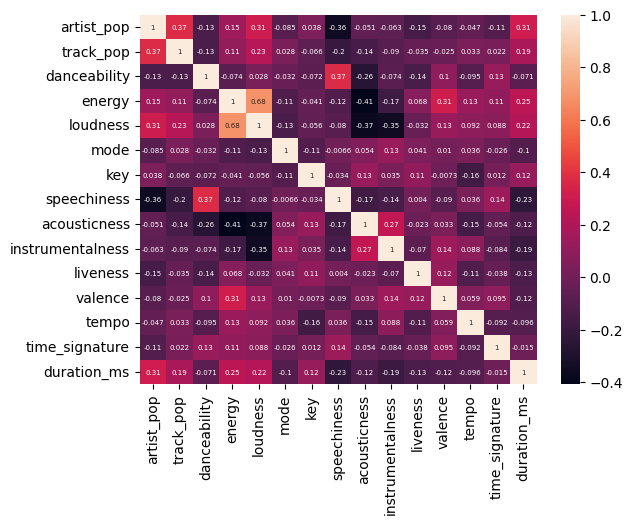

In [8]:
df=df.loc[:, ~df.columns.isin(['track_name','artist_name', 'album'])]
df.corr()
sns.heatmap(df.corr(),annot=True, annot_kws={'size': 5});

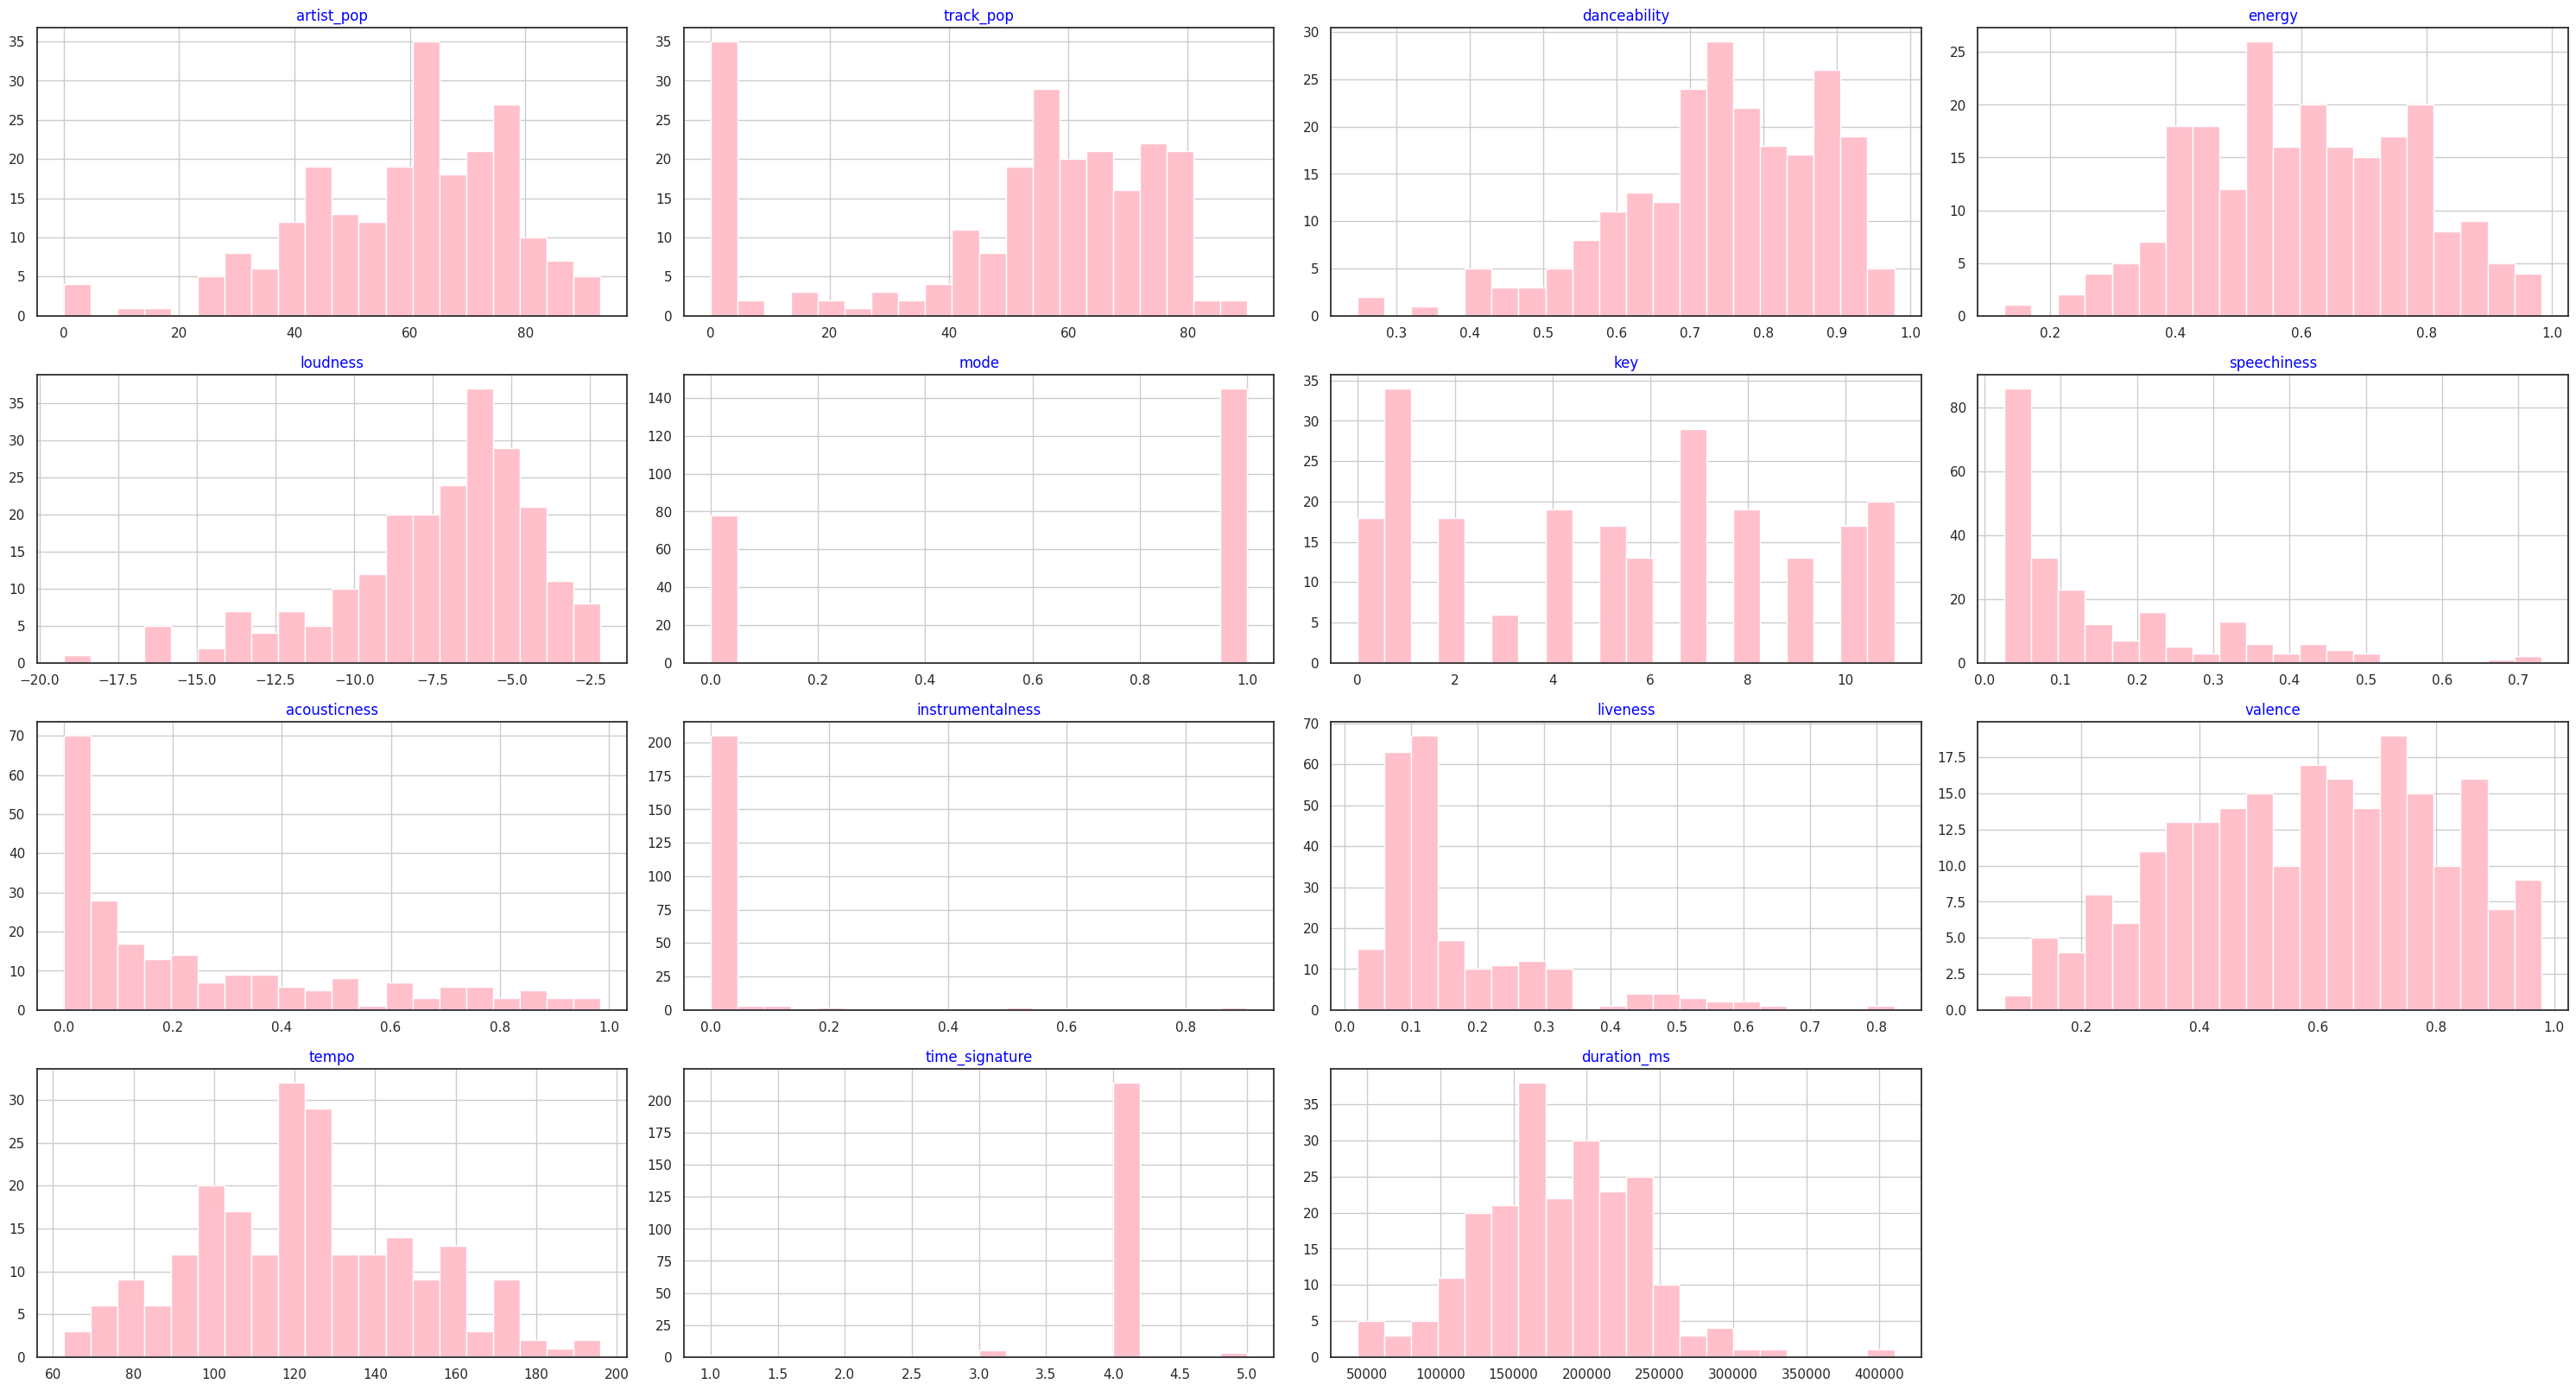

In [28]:
def draw_Histogram(dataframe, ft, rows, cols):
    fig = plt.figure(figsize = (30, 20))
    for i, feature in enumerate(ft):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'Pink')
        ax.set_title(feature, color = 'Blue')
    fig.tight_layout()  
    plt.show()
draw_Histogram(df, 
                ['artist_pop', 'track_pop', 'danceability', 'energy','loudness', 'mode', 'key', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                 'time_signature', 'duration_ms'], 5, 4)